Esse notebook analisa dados do Global Hunger Index

In [2]:
import pandas as pd

# Dados

Fonte: [ourworldindata.org](https://ourworldindata.org/hunger-and-undernourishment#the-global-hunger-index-ghi)

In [3]:
dados = pd.read_csv('global-hunger-index.csv')
#dados.tail()

In [4]:
dados = dados.rename({'Entity':'country', 
                      'Code':'code', 
                      'Year':'year', 
                      'Global Hunger Index (IFPRI (2016))':'GHI'}, 
                     axis = 'columns')
#dados.tail()

In [ ]:
dados['country'].nunique()

121

Como são os dados do Brasil?

In [ ]:
dados.query(' country == "Brazil" ').sort_values(by = 'year')

,country,code,year,GHI
70,Brazil,BRA,1992,16.1
71,Brazil,BRA,2000,11.8
72,Brazil,BRA,2008,5.4
73,Brazil,BRA,2016,5.0
74,Brazil,BRA,2017,5.4
75,Brazil,BRA,2018,8.5


In [5]:
recente = dados.query(' year == "2018" ')
recente['country'].nunique() # Opa! Alguns países sumiram!

104

In [6]:
# Quanto menor melhor então ordenando de modo crescente é dos países com menos fome para os famintos
recente = recente.sort_values(by = 'GHI')
recente

,country,code,year,GHI
540,Slovakia,SVK,2018,5.0
81,Bulgaria,BGR,2018,5.0
29,Argentina,ARG,2018,5.3
303,Kazakhstan,KAZ,2018,5.5
461,North Macedonia,MKD,2018,5.9
...,...,...,...,...
649,Zambia,ZMB,2018,37.6
354,Madagascar,MDG,2018,38.0
643,Yemen,YEM,2018,39.7
111,Chad,TCD,2018,45.4


In [7]:
num_paises = recente['country'].nunique()

Criando uma variável rank para ajduar a entender onde o Brasil está no contexto geral.

In [8]:
#recente = recente.reset_index()
#recente
recente = recente.assign(rank = range(1, num_paises + 1))
recente

,country,code,year,GHI,rank
540,Slovakia,SVK,2018,5.0,1
81,Bulgaria,BGR,2018,5.0,2
29,Argentina,ARG,2018,5.3,3
303,Kazakhstan,KAZ,2018,5.5,4
461,North Macedonia,MKD,2018,5.9,5
...,...,...,...,...,...
649,Zambia,ZMB,2018,37.6,100
354,Madagascar,MDG,2018,38.0,101
643,Yemen,YEM,2018,39.7,102
111,Chad,TCD,2018,45.4,103


Qual o rank do Brasil em 2018?

In [9]:
recente.query(' country == "Brazil" ')

,country,code,year,GHI,rank
75,Brazil,BRA,2018,8.5,17


Em relação aos países da América Latina... Como o Brasil está?

In [10]:
# Não usar
amer_sul = ['Argentina',
'Bolivia',
'Brazil',
'Chile',
'Colombia',
'Ecuador',
'French Guiana',
'Guyana',
'Paraguay',
'Peru',
'Suriname',
'Uruguay',
'Venezuela']
recente[recente['country'].isin(amer_sul)]

,country,code,year,GHI,rank
29,Argentina,ARG,2018,5.3,3
127,Colombia,COL,2018,7.7,12
486,Paraguay,PRY,2018,8.5,16
75,Brazil,BRA,2018,8.5,17
492,Peru,PER,2018,8.8,20
560,Suriname,SUR,2018,10.2,27
631,Venezuela,VEN,2018,11.4,34
170,Ecuador,ECU,2018,11.8,36
250,Guyana,GUY,2018,12.6,40
60,Bolivia,BOL,2018,16.7,50


In [11]:
amer_lat = amer_sul + ['Belize',
'Costa Rica',
'El Salvador',
'Guatemala',
'Honduras',
'Mexico',
'Nicaragua',
'Panama',
'Cuba',
'Dominican Republic',
'Haiti'
]

amer_lat_2018 = recente[recente['country'].isin(amer_lat)]

# Exportando
amer_lat_2018.to_csv('amer_lat_2018.csv', index = False)

In [12]:
# Nao usar
brics = ['Brazil',
'Russia',
'China'
'India',
'South Africa'
]
recente[recente['country'].isin(brics)]

,country,code,year,GHI,rank
508,Russia,RUS,2018,6.1,6
75,Brazil,BRA,2018,8.5,17
546,South Africa,ZAF,2018,14.5,45


In [13]:
an20162018 = dados.query(' year in (2016, 2018) ').sort_values(['country', 'year'])
an20162018

,country,code,year,GHI
3,Afghanistan,AFG,2016,34.8
5,Afghanistan,AFG,2018,34.3
9,Albania,ALB,2016,11.9
11,Albania,ALB,2018,12.2
15,Algeria,DZA,2016,8.7
...,...,...,...,...
643,Yemen,YEM,2018,39.7
647,Zambia,ZMB,2016,39.0
649,Zambia,ZMB,2018,37.6
653,Zimbabwe,ZWE,2016,28.8


In [14]:
# Criando uma coluna nova que faz a diferença da linha i pela i-1

an20162018wd = an20162018.pivot(index = ['country', 'code'], columns = 'year', values = 'GHI').reset_index()
an20162018wd = an20162018wd.assign(GHI_diff = an20162018wd[2018] - an20162018wd[2016])

import numpy as np

an20162018wd['sit_piorou'] = np.where(an20162018wd['GHI_diff'] > 0, 1, 0)
len(an20162018wd.index)

121

In [15]:
an20162018wd_pior = an20162018wd.query(' sit_piorou == 1 ').sort_values(by = 'GHI_diff', ascending = False) 
num_paises_pior = an20162018wd_pior['country'].nunique()
an20162018wd_pior = an20162018wd_pior.assign(rank_pior = range(1, num_paises_pior + 1))
len(an20162018wd_pior.index)
#an20162018wd_pior.query(' country == "Brazil" ')

56

In [16]:
an20162018wd_pior.sort_values(by = 'GHI_diff', ascending = False)

year,country,code,2016,2018,GHI_diff,sit_piorou,rank_pior
18,Central African Republic,CAF,46.1,53.7,7.6,1,1
81,Nigeria,NGA,25.5,31.1,5.6,1,2
53,Jordan,JOR,5.7,11.2,5.5,1,3
82,North Korea,PRK,28.6,34.0,5.4,1,4
68,Mauritania,MRT,22.1,27.3,5.2,1,5
112,Uganda,UGA,26.4,31.2,4.8,1,6
118,Yemen,YEM,35.0,39.7,4.7,1,7
60,Lebanon,LBN,7.1,11.7,4.6,1,8
116,Venezuela,VEN,7.0,11.4,4.4,1,9
120,Zimbabwe,ZWE,28.8,32.9,4.1,1,10


In [17]:
an2018 = an20162018['year'] == 2018
an20162018[an2018]
# Se positivo: piorou, se negativo: melhorou

,country,code,year,GHI
5,Afghanistan,AFG,2018,34.3
11,Albania,ALB,2018,12.2
17,Algeria,DZA,2018,9.4
23,Angola,AGO,2018,29.5
29,Argentina,ARG,2018,5.3
...,...,...,...,...
631,Venezuela,VEN,2018,11.4
637,Vietnam,VNM,2018,16.0
643,Yemen,YEM,2018,39.7
649,Zambia,ZMB,2018,37.6


In [18]:
an20162018[an20162018['country'] == 'Brazil']

,country,code,year,GHI
73,Brazil,BRA,2016,5.0
75,Brazil,BRA,2018,8.5


In [19]:
brazil = dados.query(' country == "Brazil" ').sort_values(by = 'year')
brazil

,country,code,year,GHI
70,Brazil,BRA,1992,16.1
71,Brazil,BRA,2000,11.8
72,Brazil,BRA,2008,5.4
73,Brazil,BRA,2016,5.0
74,Brazil,BRA,2017,5.4
75,Brazil,BRA,2018,8.5


In [20]:
#import plotnine as p9
from plotnine import *
import plotnine.scales as sc
quebras = list(brazil['year'])
quebras

[1992, 2000, 2008, 2016, 2017, 2018]

In [21]:
brazil.query(' year == 1992 ')

,country,code,year,GHI
70,Brazil,BRA,1992,16.1


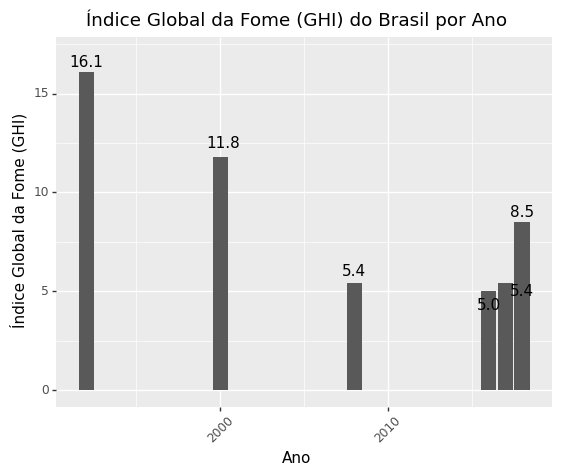

<ggplot: (8775823771569)>

In [30]:
# Create
(
ggplot(data = brazil,
       mapping = aes(x = 'year', y = 'GHI')) 
#+ geom_bar(stat = 'identity') 
+ geom_point() 
+ geom_line() 
+ labs(title = "Índice Global da Fome (GHI) do Brasil por Ano", 
       x = "Ano", 
       y = "Índice Global da Fome (GHI)")
+ ylim(0, 17)
#+ xlim(1992, 2018)
+ annotate('text', x = 1992, y = 16.6, label = '16.1')
+ annotate('text', x = 2000.2, y = 12.5, label = '11.8')
+ annotate('text', x = 2008, y = 6.0, label = '5.4')
+ annotate('text', x = 2016, y = 4.3, label = '5.0')
+ annotate('text', x = 2018, y = 5.0, label = '5.4')
+ annotate('text', x = 2018, y = 9.0, label = '8.5')
+ theme(axis_text_x=element_text(rotation = 45))
#+ scale_x_discrete(limits = ('1992', '2000', '2008', '2016', '2017', '2018', '2020'))
)

Mapa mundi
Aula 04 do André

In [ ]:
# Instalando o que vamos precisar
!pip install geopandas mapclassify

     |████████████████████████████████| 994 kB 5.3 MB/s 
     |████████████████████████████████| 6.3 MB 22.5 MB/s 
     |████████████████████████████████| 15.4 MB 38 kB/s 


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#mundo = gpd.read_file('WB_countries_Admin0_topojson.json')
#mundo.plot(figsize=(10,5))
#plt.show()

DriverError: ignored